<a href="https://colab.research.google.com/github/SUJOY-RAY/Machine-Learning-in-python/blob/main/Image_classification_using_CNNs_on_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install tensorflow

In [19]:
from tensorflow.keras.datasets import cifar10

In [20]:
(x_train, y_train),(x_test,y_test)=cifar10.load_data()


In [21]:
from tensorflow.keras.utils import to_categorical

#normalize the images to the range of [0,1]
x_train,x_test=x_train/255.0, x_test/255.0

#convert class vectors to binary class matrices
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

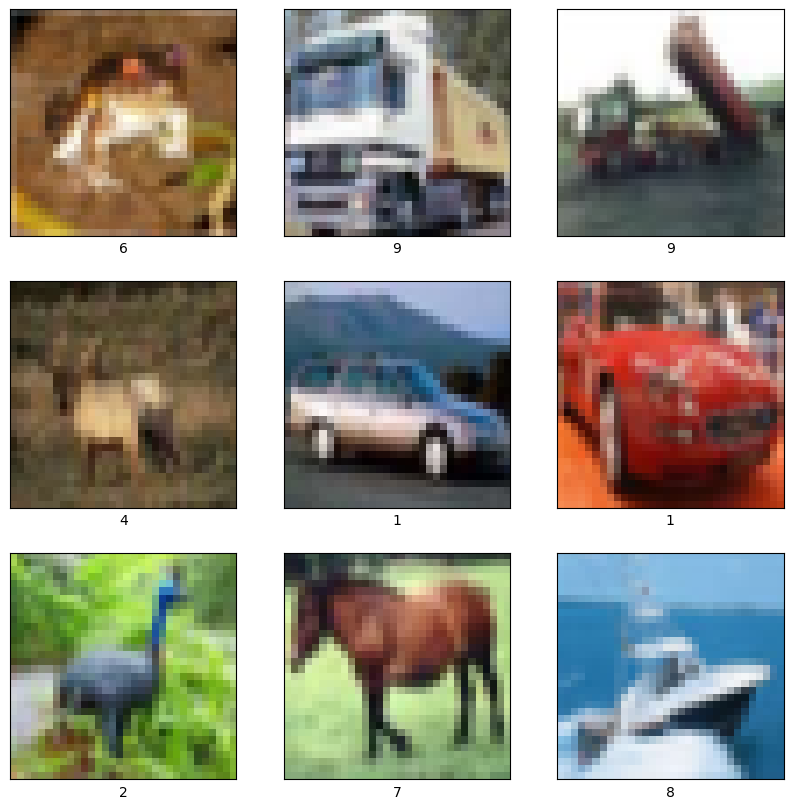

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))

for i in range (9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(np.argmax(y_train[i]))
plt.show()

#Model Building

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout

In [30]:
model=Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

# Train model

In [33]:
history=model.fit(x_train,y_train,epochs=20,
                  validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 74s 47ms/step - loss: 1.7392 - accuracy: 0.3566 - val_loss: 1.4284 - val_accuracy: 0.4834
Epoch 2/20
1563/1563 [==============================] - 96s 61ms/step - loss: 1.3924 - accuracy: 0.4991 - val_loss: 1.2166 - val_accuracy: 0.5705
Epoch 3/20
1563/1563 [==============================] - 110s 71ms/step - loss: 1.2590 - accuracy: 0.5553 - val_loss: 1.1230 - val_accuracy: 0.6039
Epoch 4/20
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1746 - accuracy: 0.5875 - val_loss: 1.0929 - val_accuracy: 0.6062
Epoch 5/20
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1090 - accuracy: 0.6133 - val_loss: 0.9780 - val_accuracy: 0.6533
Epoch 6/20
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0548 - accuracy: 0.6302 - val_loss: 0.9860 - val_accuracy: 0.6522
Epoch 7/20
1563/1563 [==============================] - 110s 71ms/step - loss: 1.0055 - accuracy: 0.6485 - val_loss: 0.9566

#Visualize Training progress

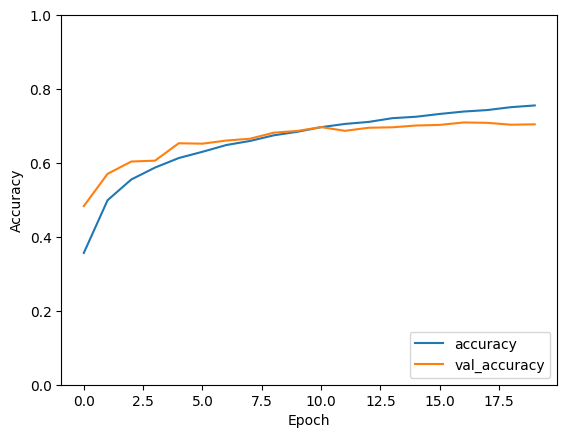

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

In [37]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f"test accuracy: {test_acc}")

313/313 - 3s - loss: 0.9071 - accuracy: 0.7045 - 3s/epoch - 9ms/step
test accuracy: 0.7045000195503235


In [38]:
predictions=model.predict(x_test)

313/313 [==============================] - 3s 11ms/step


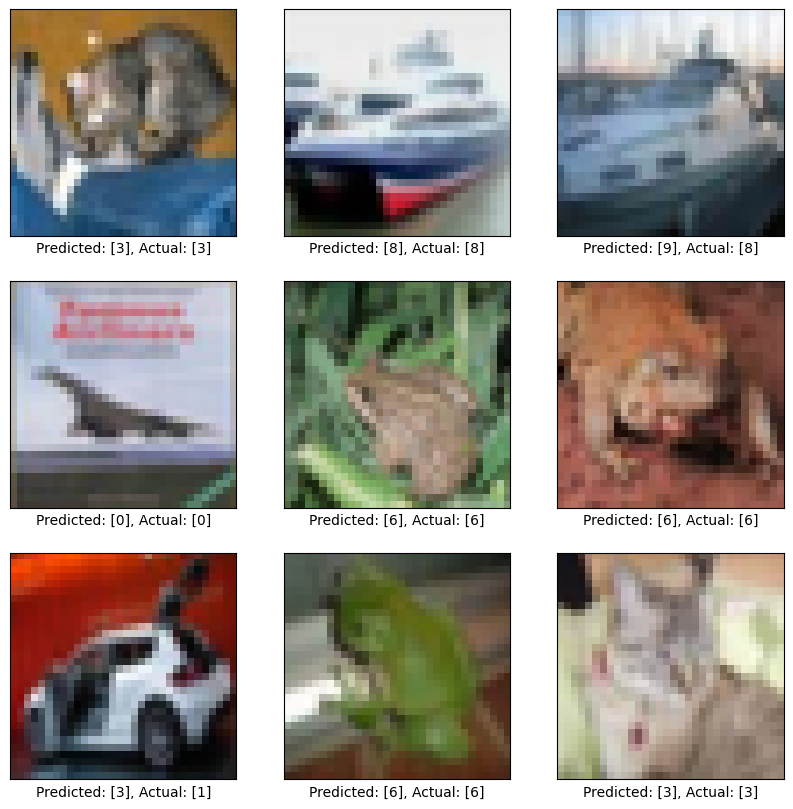

In [41]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i])
  plt.xlabel(f"Predicted: {[np.argmax(predictions[i])]}, Actual: {[np.argmax(y_test[i])]}")
plt.show()

In [42]:
model.save('cifar10_cnn_model.h5')